In [1]:
# Import of all relevant libraries: 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from sklearn.metrics import silhouette_samples 
from matplotlib import cm 
%matplotlib inline 

In [8]:
column_types = {'pdes': 'object',
               'name': 'object',
                'prefix': 'object'}

# Laden Sie das DataFrame mit den angegebenen Datentypen
df = pd.read_csv('asteroid_dataset.csv', dtype=column_types)
#df = pd.read_csv('asteroid_dataset.csv') #Loading the dataset.
df #Look into the loaded data. 

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [9]:
df.info() #Brief overview of dataframe and its data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [10]:
df.describe() #extended overview

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [12]:
#Examine the data to null values, zero found --> therefore no further action is necessary.
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [13]:
columns_to_drop = ['name', 'prefix','diameter', 'albedo', 'diameter_sigma']
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0].index.tolist()
print("Spalten mit Nullwerten:", columns_with_nulls)

Spalten mit Nullwerten: ['neo', 'pha', 'H', 'ma', 'ad', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']


In [15]:
for i in columns_with_nulls:
    df = df.dropna(subset=[i])
#Examine the data to null values, zero found --> therefore no further action is necessary.
df.isnull().sum()

id           0
spkid        0
full_name    0
pdes         0
neo          0
pha          0
H            0
orbit_id     0
epoch        0
epoch_mjd    0
epoch_cal    0
equinox      0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
rms          0
dtype: int64

In [16]:
df

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [17]:
mapping = {'Y': 1, 'N': 0}
df['neo'] = df['neo'].map(mapping).astype(int)
df['pha'] = df['pha'].map(mapping).astype(int)

In [23]:
ergebnis_zaehlung = df['pha'].value_counts()
print(ergebnis_zaehlung)
print(ergebnis_zaehlung[1]/(ergebnis_zaehlung[0]+ergebnis_zaehlung[1]))

pha
0    930269
1      2066
Name: count, dtype: int64
0.002215941694777092


In [18]:
df.describe() #extended overview

,spkid,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.323350e+05,932335.000000,932335.000000,932335.000000,9.323350e+05,932335.000000,9.323350e+05,932335.000000,932335.000000,932335.000000,...,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05
mean,3.800202e+06,0.024544,0.002216,16.890009,2.458895e+06,58894.728019,2.019763e+07,0.156221,2.932576,2.398889,...,1.980729e+01,9.920530e-01,4.104756e+00,4.305258e+05,4.304413e+05,2.120456e+01,2.471471e-02,1.281599e+08,8.559499e+04,5.669526e-01
std,6.890766e+06,0.154730,0.047022,1.801243,6.439097e+02,643.909665,1.775660e+04,0.093001,36.458214,2.165155,...,2.913524e+03,1.284591e+02,1.337408e+03,7.330317e+07,7.329691e+07,7.221158e+03,9.820940e+00,2.194193e+10,2.776960e+07,2.783500e+00
min,2.000001e+06,0.000000,0.000000,-1.100000,2.425052e+06,25051.000000,1.927062e+07,0.000003,0.555418,0.070511,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,3.292200e-11
25%,2.233086e+06,0.000000,0.000000,16.000000,2.459000e+06,59000.000000,2.020053e+07,0.092159,2.389088,1.972209,...,1.457800e-07,6.080850e-06,3.604400e-05,5.733400e-05,2.562600e-05,2.330950e-08,2.758900e-09,1.105900e-04,1.786300e-05,5.220800e-01
50%,2.466169e+06,0.000000,0.000000,16.900000,2.459000e+06,59000.000000,2.020053e+07,0.144933,2.647971,2.227213,...,2.256800e-07,8.645100e-06,6.583800e-05,1.037900e-04,4.853800e-05,4.320600e-08,4.605400e-09,2.207400e-04,3.469800e-05,5.680300e-01
75%,3.734394e+06,0.000000,0.000000,17.700000,2.459000e+06,59000.000000,2.020053e+07,0.200589,3.002982,2.580130,...,6.203350e-07,1.554800e-05,1.568000e-04,2.978400e-04,1.626600e-04,1.143500e-07,1.077200e-08,7.716300e-04,9.360750e-05,6.149300e-01
max,5.401723e+07,1.000000,1.000000,33.200000,2.459000e+06,59000.000000,2.020053e+07,0.999851,33488.895955,80.398819,...,1.015000e+06,5.533000e+04,1.199100e+06,3.340000e+10,3.339300e+10,5.509700e+06,7.698800e+03,1.041500e+13,1.910700e+10,2.686600e+03


In [19]:
duplicate_rows = df[df.duplicated()]
duplicate_df = df[df.duplicated()].copy()
print("Duplikate anzeigen:")
duplicate_df

Duplikate anzeigen:


,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms


In [20]:
#Create a list of all numeric attributes to create a reusable code.
attributes_num = []
for i in df.columns:
    if df[i].dtype == "float64" or df[i].dtype == "int64":
        attributes_num.append(i)

array([[<Axes: title={'center': 'spkid'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'epoch'}>,
        <Axes: title={'center': 'epoch_mjd'}>,
        <Axes: title={'center': 'epoch_cal'}>,
        <Axes: title={'center': 'e'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'q'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'om'}>,
        <Axes: title={'center': 'w'}>, <Axes: title={'center': 'ma'}>],
       [<Axes: title={'center': 'ad'}>, <Axes: title={'center': 'n'}>,
        <Axes: title={'center': 'tp'}>,
        <Axes: title={'center': 'tp_cal'}>,
        <Axes: title={'center': 'per'}>,
        <Axes: title={'center': 'per_y'}>],
       [<Axes: title={'center': 'moid'}>,
        <Axes: title={'center': 'moid_ld'}>,
        <Axes: title={'center': 'sigma_e'}>,
        <Axes: title={'center': 'sigma_a'}>,
        <Axes: title={'center': 'sigma_q'}>,
        <Axes: title={'center': 'sigma_i'}>],
       [<Axes: title={'cente

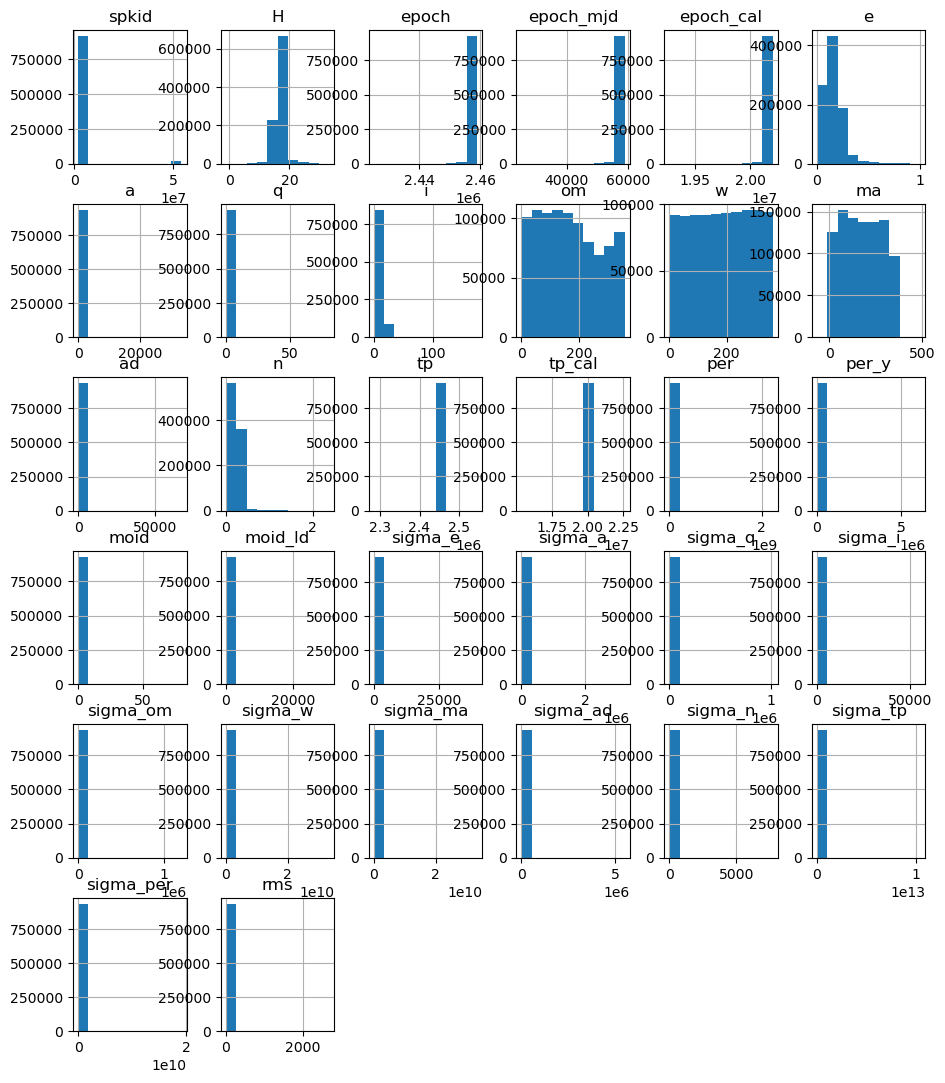

In [21]:
# Visualization of all numerical attributes: 

df_num = df[attributes_num]
df_num.hist(figsize=[11,13])
